In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import time

from sklearn.linear_model import LinearRegression  




In [11]:
data = pd.read_csv('Absenteeism_data.csv')

In [12]:
data

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,11,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,36,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,3,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,11,23,23/07/2015,289,36,33,239.554,30,1,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
695,17,10,23/05/2018,179,22,40,237.656,22,2,2,0,8
696,28,6,23/05/2018,225,26,28,237.656,24,1,1,2,3
697,18,10,24/05/2018,330,16,28,237.656,25,2,0,0,8
698,25,23,24/05/2018,235,16,32,237.656,25,3,0,0,2


In [14]:
T =  data[['Date','ID' ]]

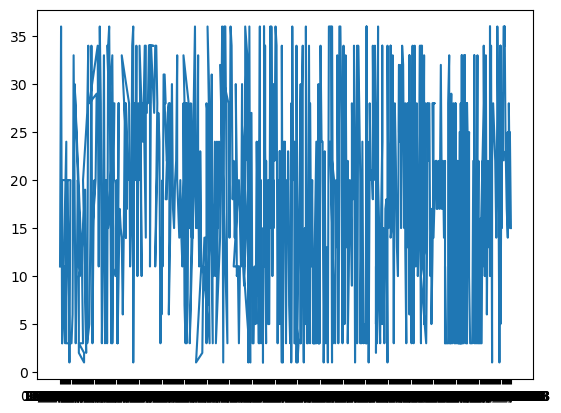

In [15]:
plt.plot( T['Date'] , T['ID'])
plt.show()

In [16]:
x =  data.drop(['ID' , 'Date'] , axis = 1)
y = data[['ID']]

In [17]:
x

,Reason for Absence,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,26,289,36,33,239.554,30,1,2,1,4
1,0,118,13,50,239.554,31,1,1,0,0
2,23,179,51,38,239.554,31,1,0,0,2
3,7,279,5,39,239.554,24,1,2,0,4
4,23,289,36,33,239.554,30,1,2,1,2
...,...,...,...,...,...,...,...,...,...,...
695,10,179,22,40,237.656,22,2,2,0,8
696,6,225,26,28,237.656,24,1,1,2,3
697,10,330,16,28,237.656,25,2,0,0,8
698,23,235,16,32,237.656,25,3,0,0,2


In [18]:
regr = LinearRegression()

regr.fit(x,y)

print('Intercept : ' , regr.intercept_)
print('R-square : ' , regr.score(x,y))
pd.DataFrame(data = regr.coef_ , index = x.columns  , columns = ['Coef'])



Intercept :  [66.52364014]
R-square :  0.4408308698281971


ValueError: Shape of passed values is (1, 10), indices imply (10, 1)

In [21]:

x_train , x_test  , y_train  , y_test  = train_test_split(x , y ,
                                                          test_size = 0.2 , random_state = 10 )

regr = LinearRegression()

regr.fit(x_train , y_train)

print('R-square : ' , regr.score(x_train , y_train))
print('R-square 2  : ' , regr.score(x_test , y_test))

print('Intercept : ' , regr.intercept_)


print(regr.coef_)

NameError: name 'train_test_split' is not defined

# Multible Regression 

In [22]:
regr = LinearRegression()

regr.fit(x,y)

print('Intercept : ' , regr.intercept_)
print('R-square : ' , regr.score(x,y))

print(regr.coef_)

Intercept :  [66.52364014]
R-square :  0.4408308698281971
[[-3.57929804e-02 -3.50663473e-02 -3.58930284e-01  2.13582672e-01
  -1.48087972e-03 -1.15047966e+00 -5.01147006e+00 -1.19056693e-01
   1.49498092e+00 -6.54814604e-02]]


In [23]:
regr = LinearRegression()

regr.fit(x,y)

print('Intercept : ' , regr.intercept_)
print('R-square : ' , regr.score(x,y))

predictedCO2 = regr.predict([[118 , 13 , 1]])

print(predictedCO2)


print(regr.coef_)

Intercept :  [66.52364014]
R-square :  0.4408308698281971


C:\Users\muham\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: X has 3 features, but LinearRegression is expecting 10 features as input.

# Data Transformation

In [24]:
data['Reason for Absence'].skew()

-0.9534165025642067

In [25]:
y_log = np.log(data['Transportation Expense'])
y_log

0      5.666427
1      4.770685
2      5.187386
3      5.631212
4      5.666427
         ...   
695    5.187386
696    5.416100
697    5.799093
698    5.459586
699    5.673323
Name: Transportation Expense, Length: 700, dtype: float64

In [26]:
y_log.skew()

-0.2859076562205437

C:\Users\muham\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'log price with skew-0.2859076562205437')

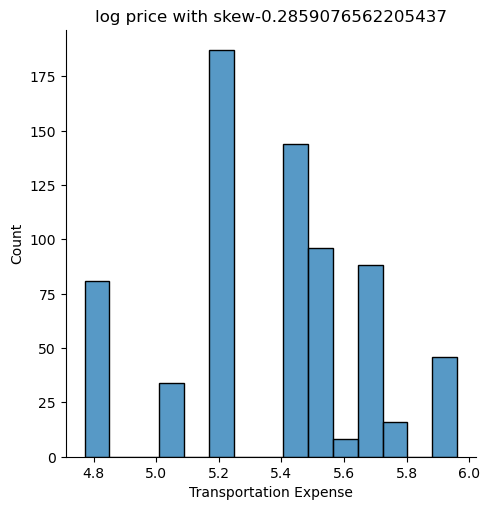

In [27]:
sns.displot(y_log)
plt.title(f'log price with skew{y_log.skew()}')

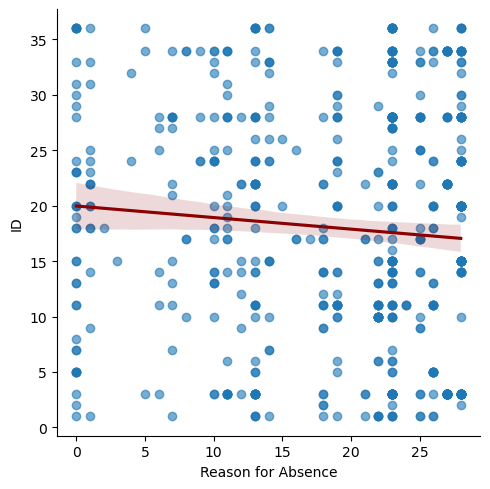

In [28]:
sns.lmplot(x='Reason for Absence'  ,y= 'ID' ,  data = data 
          , scatter_kws={'alpha' : 0.6 } , line_kws ={'color':'darkred'} )

In [29]:
feature = data.drop('ID', axis = 1)
Absence = data['ID']

In [30]:
Absence

0      11
1      36
2       3
3       7
4      11
       ..
695    17
696    28
697    18
698    25
699    15
Name: ID, Length: 700, dtype: int64

# Log(Y) ->  to decrease the skewness in the data scatter 

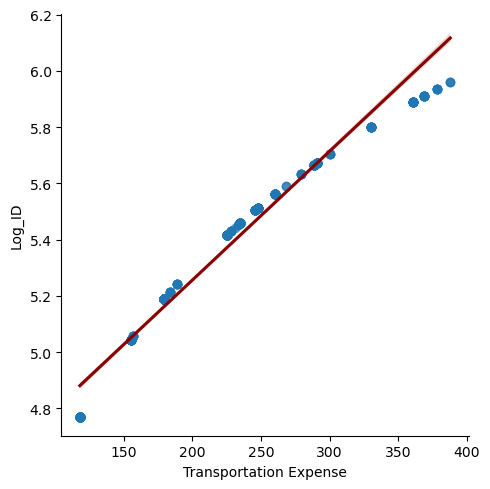

In [31]:
transformed_data = feature
transformed_data['Log_ID']  = y_log
sns.lmplot(x='Transportation Expense'  ,y= 'Log_ID' ,  data = transformed_data 
          , scatter_kws={'alpha' : 0.6 } , line_kws ={'color':'darkred'}  )

## Regression Using log Function 

In [ ]:
Absence_log

In [32]:
Absence_log = np.log(data['ID'])


regr = LinearRegression()

regr.fit(feature,Absence_log)

print('Intercept : ' , regr.intercept_)
print('R-square : ' , regr.score(feature,Absence_log))




print(regr.coef_) 

ValueError: could not convert string to float: '07/07/2015'

## Train test split

In [33]:
from sklearn.model_selection import train_test_split


In [34]:
feature = feature.drop(['Date'] ,axis = 1)

In [35]:
Absence_log = np.log(data['ID'])

x_train , x_test  , y_train  , y_test  = train_test_split(feature , Absence_log ,
                                                          test_size = 0.2 , random_state = 10 )

regr = LinearRegression()

regr.fit(x_train , y_train)

print('R-square : ' , regr.score(x_train , y_train))
print('R-square : ' , regr.score(x_test , y_test))

print('Intercept : ' , regr.intercept_)

pd.DataFrame(data = regr.coef_  , index = x_train.columns , columns = ['coef'] )

R-square :  0.4805311112268049
R-square :  0.6400319544676191
Intercept :  19.94293260105431


,coef
Reason for Absence,-0.002236
Transportation Expense,0.012647
Distance to Work,-0.022117
Age,0.008531
Daily Work Load Average,-0.000220
Body Mass Index,-0.127171
Education,-0.472906
Children,0.036854
Pets,0.060647
Absenteeism Time in Hours,-0.003083


In [36]:
np.e**0.012647

1.0127273115139508

In [37]:
## every increase in Transportation Expenses for 1.0127 %  causes 1 Absence  

## P-value & Evaluating Coefficients 

In [38]:
import statsmodels.api as sm

In [68]:

x_include_constant = sm.add_constant(x_train)

model =  sm.OLS(y_train,x_include_constant)

results = model.fit()

#results.params
#results.pvalues

num_Coef_P_val = pd.DataFrame({'coef' : results.params  , 'P-value' : round(results.pvalues ,3) } )


# P-v  > 0.05  (it's not significant )it means we can drop this from our model 

## Testing for Multicollinearity With VIF 

$$ Tax = \alpha_0 + \alpha_2 NOX +  \alpha_{12}LSTAT $$ 

$$ VIF_ {TAX} = \frac{1}{(1-R_{TAX} ^ 2 ) } $$

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [67]:
vif = [variance_inflation_factor(exog=x_include_constant , exog_idx = i ) 
      for i in range (x_include_constant.shape[1])]
num_vif = pd.DataFrame({'Coef_name': x_include_constant.columns , 'vif' : np.around(vif,2)  } ) 


##  Vif >= 5  we will not include this variable for our regression 
##   Vif  < 5  we will include that 

## Model sipolification with BIC 

###### A lower BIC value indicates a better fit. 

#### a higher R-squared indicates the model is a good fit

In [71]:
# Modeel number 1 full data



x_include_constant = sm.add_constant(x_train)

model =  sm.OLS(y_train,x_include_constant)

results = model.fit()

#results.params
#results.pvalues

num_BIC1 = pd.DataFrame({'coef' : results.params  , 'P-value' : round(results.pvalues ,3) } )

print('BIC is ', results.bic)
print('R-square is ' , results.rsquared)

# P-v  > 0.05  (it's not significant )it means we can drop this from our model 

BIC is  1251.4619690014754
R-square is  0.4805311112268045


In [82]:
# Modeel number 2 dropped Reason for Absence , Age , Daily Work Load Average , 
# Absenteeism Time in Hours  , Children	

x_include_constant = sm.add_constant(x_train)
x_include_constant = x_include_constant.drop(['Children','Age' , 'Reason for Absence' , 
                                             'Daily Work Load Average' , 'Absenteeism Time in Hours'
                                             ] , axis = 1)


model =  sm.OLS(y_train,x_include_constant)

results = model.fit()

#results.params
#results.pvalues

num_BIC2 = pd.DataFrame({'coef' : results.params  , 'P-value' : round(results.pvalues ,3) } )

print('BIC is ', results.bic)
print('BIC is ' , results.rsquared)

# P-v  > 0.05  (it's not significant )it means we can drop this from our model 

BIC is  1226.1797774346578
BIC is  0.4746001526062481


In [81]:
frames  =  [num_Coef_P_val , num_BIC1, num_BIC2 ]
pd.concat(frames , axis = 1)

,coef,P-value,coef,P-value,coef,P-value
const,19.942933,0.000,19.942933,0.000,7.347592,0.000
Reason for Absence,-0.002236,0.542,-0.002236,0.542,NaN,NaN
Transportation Expense,0.012647,0.000,0.012647,0.000,-0.000286,0.583
Distance to Work,-0.022117,0.000,-0.022117,0.000,-0.027048,0.000
Age,0.008531,0.130,0.008531,0.130,NaN,NaN
Daily Work Load Average,-0.000220,0.776,-0.000220,0.776,NaN,NaN
Body Mass Index,-0.127171,0.000,-0.127171,0.000,-0.121184,0.000
Education,-0.472906,0.000,-0.472906,0.000,-0.566513,0.000
Children,0.036854,0.231,0.036854,0.231,NaN,NaN
Pets,0.060647,0.034,0.060647,0.034,0.054876,0.054


## Residuals & Residual Plots 

In [91]:
# Modified Model : Transformed (Using log & Drop Two features)

x =  data.drop(['Children','Age' , 'Reason for Absence' ,
                'Daily Work Load Average' , 'Absenteeism Time in Hours'
                                             ] , axis = 1)
y = np.log(data['ID'])

Absence_log = np.log(data['ID'])

x_train , x_test  , y_train  , y_test  = train_test_split(feature , Absence_log ,
                                                          test_size = 0.2 , random_state = 10 )

# using stats model

x_include_constant = sm.add_constant(x_train)
model =  sm.OLS(y_train,x_include_constant)
results = model.fit()

# Reseduals 
#calculate Reseduals  Manually 

reseduals =  y_train - results.fittedvalues 
reseduals
#  reseduals.describe()



16    -0.478359
280   -0.469435
353   -1.779099
374   -0.472582
300    0.200184
         ...   
369    0.225836
320    0.349637
527   -1.124840
125    0.236071
265   -1.761858
Length: 560, dtype: float64

Text(0.5, 1.0, 'actual vs predicted log prices $y _i$ vs $\\hat y _i$  (correlation 0.69) ')

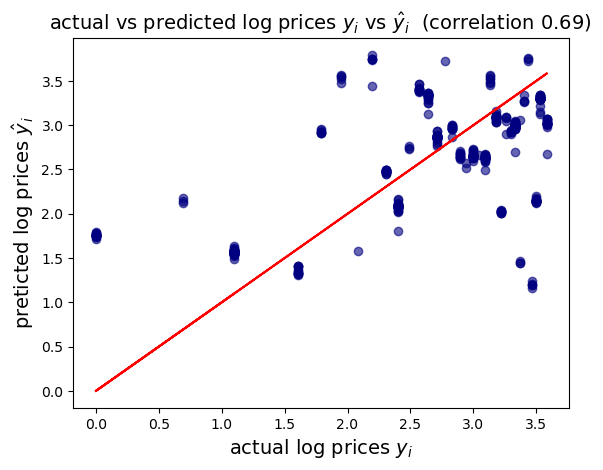

In [132]:
# Modified Model : Transformed (Using log & Drop Two features)

x =  data.drop(['Children','Age' , 'Reason for Absence' ,
                'Daily Work Load Average' , 'Absenteeism Time in Hours'
                                             ] , axis = 1)
y = np.log(data['ID'])

Absence_log = np.log(data['ID'])

x_train , x_test  , y_train  , y_test  = train_test_split(feature , Absence_log ,
                                                          test_size = 0.2 , random_state = 10 )

# using stats model

x_include_constant = sm.add_constant(x_train)
model =  sm.OLS(y_train,x_include_constant)
results = model.fit()

# Reseduals 
#calculate Reseduals  Manually 

# reseduals =  y_train - results.fittedvalues 
results.resid
#  reseduals.describe()

#--------------------------------------------------------------------

# Graph of actual vs predicted prices 

corr = round(y_train.corr(results.fittedvalues)  , 2)

plt.scatter(x=y_train , y = results.fittedvalues , c = 'navy' , alpha = 0.6 )
plt.plot(y_train, y_train , c='red')

plt.xlabel('actual log prices $y _i$' ,fontsize = 14 )
plt.ylabel('preticted log prices $\hat y  _i$' ,fontsize = 14 )
plt.title(f'actual vs predicted log prices $y _i$ vs $\hat y _i$  (correlation {corr}) ',fontsize = 14 )

#---------------------------------------------------------------------------------



Text(0.5, 1.0, 'actual vs predicted  prices $y _i$ vs $\\hat y _i$  (correlation 0.69) ')

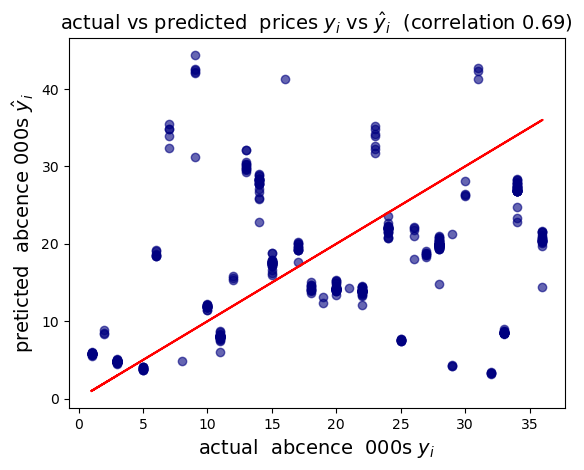

In [129]:
plt.scatter(x = np.e**y_train , y = np.e**results.fittedvalues , c = 'navy' , alpha = 0.6 )
plt.plot(np.e**y_train, np.e**y_train , c='red')

plt.xlabel('actual  abcence  000s $y _i$' ,fontsize = 14 )
plt.ylabel('preticted  abcence 000s $\hat y  _i$' ,fontsize = 14 )
plt.title(f'actual vs predicted  prices $y _i$ vs $\hat y _i$  (correlation {corr}) ',fontsize = 14 )


Text(0.5, 1.0, 'Rediduals vs fitted values log prices $y _i$ vs $\\hat y _i$  (correlation 0.69) ')

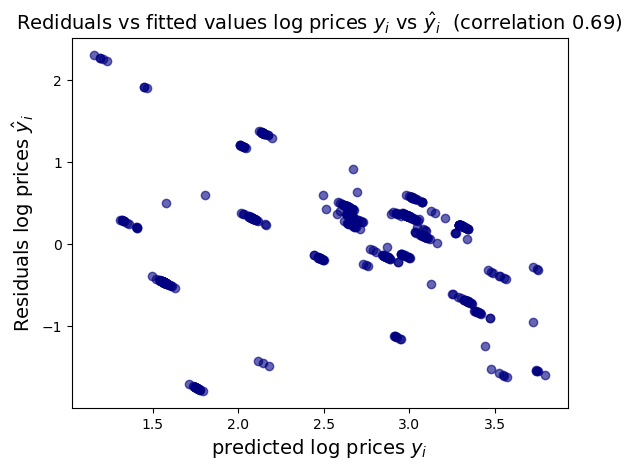

In [131]:
plt.scatter(x=  results.fittedvalues , y = results.resid , c = 'navy' , alpha = 0.6 )

plt.xlabel('predicted log prices $y _i$' ,fontsize = 14 )
plt.ylabel('Residuals log prices $\hat y  _i$' ,fontsize = 14 )
plt.title(f'Rediduals vs fitted values log prices $y _i$ vs $\hat y _i$  (correlation {corr}) ',fontsize = 14 )


C:\Users\muham\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


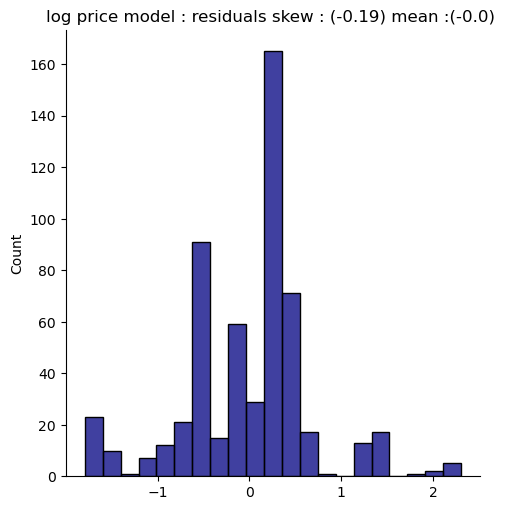

In [142]:
# (log prices ) - checking for normality :
#----------------------------------------

resid_mean  = round(results.resid.mean() , 3)
resid_skew = round(results.resid.skew() , 3 ) 

sns.displot(results.resid , color='navy')
plt.title(f'log price model : residuals skew : ({resid_skew}) mean :({resid_mean}) ')
plt.show()